In [1]:
!pip install mlxtend

In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.simplefilter('ignore')

## Movies Dataset

In [4]:
#my_movies data set
movies =pd.read_csv("my_movies.csv")

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [8]:
movies.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [9]:
movies=pd.get_dummies(movies)
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


#Apriori algorithm

In [10]:
frequent_itemsets = apriori(movies, min_support=0.1, max_len = 6)
frequent_itemsets

,support,itemsets
0,0.6,(0)
1,0.7,(1)
2,0.2,(2)
3,0.2,(3)
4,0.6,(4)
...,...,...
1207,0.1,"(5, 9, 13, 21, 23, 24)"
1208,0.1,"(5, 9, 16, 21, 23, 24)"
1209,0.1,"(5, 13, 16, 21, 23, 24)"
1210,0.1,"(7, 9, 13, 15, 20, 23)"


In [11]:
frequent_itemsets.sort_values("support", ascending = False).shape

(1212, 2)

In [12]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   1212 non-null   float64
 1   itemsets  1212 non-null   object 
dtypes: float64(1), object(1)
memory usage: 19.1+ KB


In [13]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3 )
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(1),(0),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(2),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(3),(0),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(0),(4),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
29459,(13),"(9, 16, 21, 23, 24)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
29460,(16),"(9, 13, 21, 23, 24)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
29461,(21),"(9, 13, 16, 23, 24)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
29462,(23),"(9, 13, 16, 21, 24)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [14]:
rules.sort_values('confidence',ascending = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(0),(23),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
8,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
441,(0),"(13, 23)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
372,(0),"(9, 13)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
12,(0),(13),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
...,...,...,...,...,...,...,...,...,...,...
11270,"(16, 3)","(9, 2, 13)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
11269,"(3, 13)","(16, 9, 2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
11268,"(9, 3)","(16, 2, 13)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
11283,"(9, 21, 3, 13)",(2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [15]:
rules.sort_values('confidence')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,(0),(23),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
8,(0),(9),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
441,(0),"(13, 23)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
372,(0),"(9, 13)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
12,(0),(13),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
398,(0),"(9, 23)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
2672,(0),"(9, 13, 23)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.0
13195,(5),"(24, 9, 3, 23)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.0
25670,"(9, 13)","(2, 3, 21, 23)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.0
5227,"(13, 23)","(16, 9)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.0


In [16]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14732,"(24, 9, 23)","(16, 21)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
18524,"(13, 5)","(0, 16, 2, 21)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
18522,"(16, 2)","(0, 13, 21, 5)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
18521,"(2, 13)","(0, 16, 21, 5)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
18519,"(0, 21)","(16, 2, 13, 5)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
218,"(0, 23)",(1),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333
197,"(0, 13)",(1),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333
40,(23),(1),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333
188,"(0, 9)",(1),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [17]:
rules.sort_values("confidence", ascending = True).shape

(29464, 10)

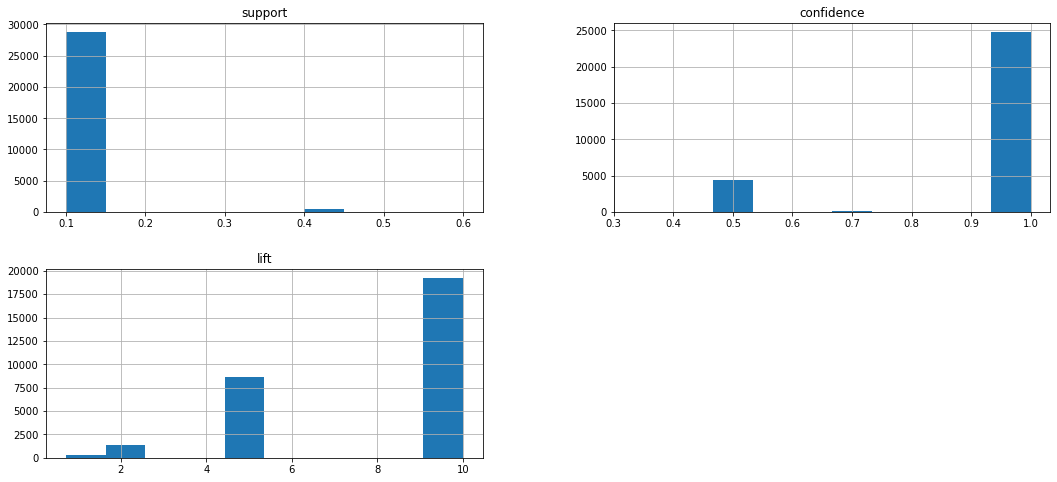

In [18]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(18,8))
plt.show()

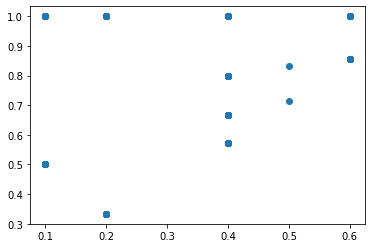

In [19]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show()

## Book Dataset

In [20]:
#book data set
book=pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [21]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [22]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [23]:
book.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


In [24]:
frequent = apriori(book, min_support=0.1, max_len = 6)
frequent

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.1135,(7)
8,0.1085,(10)
9,0.1650,"(0, 1)"


In [25]:
frequent.sort_values("support", ascending = False).shape

(39, 2)

In [26]:
frequent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   39 non-null     float64
 1   itemsets  39 non-null     object 
dtypes: float64(1), object(1)
memory usage: 752.0+ bytes


In [27]:
rules1 = association_rules(frequent, metric="confidence", min_threshold=0.3 )
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(1),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(1),(0),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(0),(2),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(2),(0),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(0),(3),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
84,"(2, 5)",(6),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
85,"(2, 6)",(5),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
86,"(5, 6)",(2),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
87,(5),"(2, 6)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [28]:
rules1.sort_values('confidence',ascending = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,(0),"(1, 2)",0.4230,0.1620,0.1290,0.304965,1.882497,0.060474,1.205694,0.812462
48,(2),"(0, 3)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021,0.802850
47,(0),"(2, 3)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749,0.791618
62,(2),"(0, 6)",0.4310,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522,0.769466
61,(0),"(2, 6)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894,0.789141
...,...,...,...,...,...,...,...,...,...,...
51,"(0, 4)",(2),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
86,"(5, 6)",(2),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
81,"(3, 6)",(2),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
76,"(3, 5)",(2),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591


In [29]:
rules1.sort_values('confidence')[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,(0),"(1, 2)",0.423,0.1620,0.1290,0.304965,1.882497,0.060474,1.205694,0.812462
48,(2),"(0, 3)",0.431,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021,0.802850
47,(0),"(2, 3)",0.423,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749,0.791618
62,(2),"(0, 6)",0.431,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522,0.769466
61,(0),"(2, 6)",0.423,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894,0.789141
22,(2),(4),0.431,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
6,(0),(4),0.423,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
77,(3),"(2, 5)",0.282,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418,0.746546
73,(6),"(0, 5)",0.276,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
67,(3),"(0, 6)",0.282,0.1950,0.1045,0.370567,1.900346,0.049510,1.278930,0.659861


In [30]:
rules1.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(7),(2),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
69,"(0, 5)",(6),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
73,(6),"(0, 5)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
78,(5),"(2, 3)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
74,"(2, 3)",(5),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
...,...,...,...,...,...,...,...,...,...,...
5,(3),(0),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(1),(2),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(2),(1),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(2),(0),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [31]:
rules1.sort_values("confidence", ascending = True).shape

(89, 10)

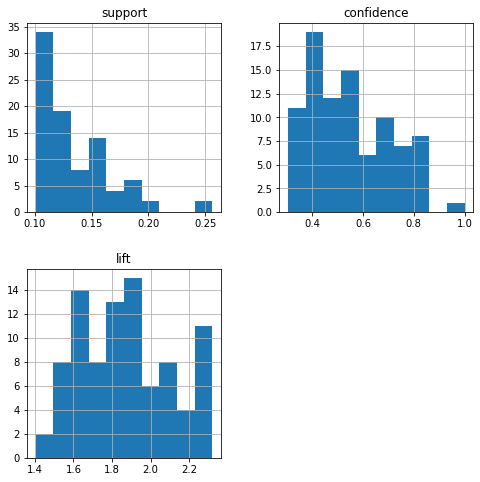

In [32]:
import matplotlib.pyplot as plt
rules1[['support','confidence','lift']].hist(figsize=(8,8))
plt.show()

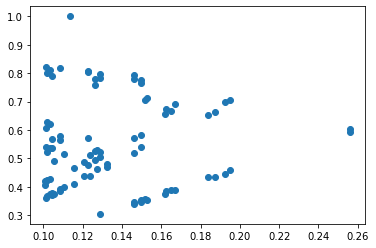

In [33]:
plt.scatter(rules1['support'], rules1['confidence'])
plt.show()